### Problem: Poor lead conversion rate for company X

### Goal: Building a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads

In [93]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

# libraries to work on the dataframe

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
# Reading the data file using pandas

# Converting dataset 'Lead' into 'lscs_df':-

Lscs_df = pd.read_csv('Leads.csv')

Lscs_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [95]:
# check the shape of the dataset

Lscs_df.shape

(9240, 37)

In [96]:
# check statistics summary for numerical columns

Lscs_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [97]:
# check whether there are any duplicates
Lscs_df.duplicated().sum()

0

**there are no duplicates present in the dataset


In [98]:
#Checking column wise info:-

Lscs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Cleaning

In [99]:
# Checking datatype of columns:-

Lscs_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [100]:
# replace "select" with null values as it seems to be unfilled by user

Lscs_df.replace('Select',np.NaN,inplace=True)
Lscs_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Dealing with Null/Missing values

In [101]:
#percentage of missing values

round(100*(Lscs_df.isna().sum()/len(Lscs_df)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [102]:
#Dropping Columns having missing values more than 40%

Lscs_df.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index',
              'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [103]:
#Dropping few irrelevant columns

Lscs_df.drop(['A free copy of Mastering The Interview','I agree to pay the amount through cheque','Tags','Last Notable Activity','Last Activity'],axis=1,inplace=True)

In [104]:
# Checking the remaining columns for missing values:-

round(100*(Lscs_df.isnull().sum()/len(Lscs_df)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

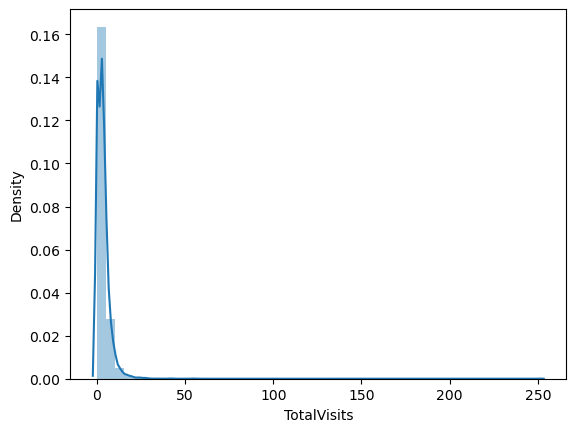

In [105]:
#looking at the distribution for the column TotalVisits

sns.distplot(Lscs_df.TotalVisits)
plt.show()

In [106]:
#imputing it with the median

Lscs_df.TotalVisits.fillna(Lscs_df.TotalVisits.median(),inplace=True)

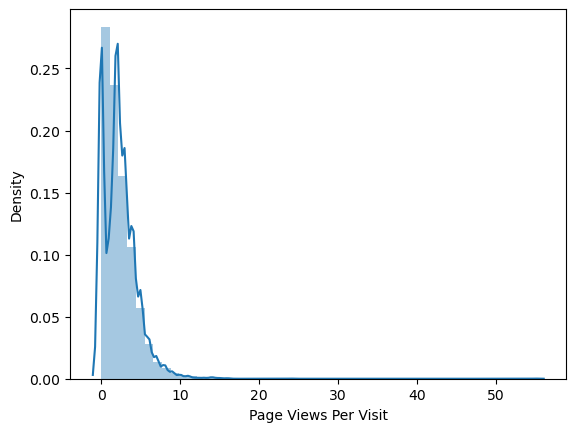

In [107]:
#Looking the distribution of the column Page Views Per Visit

sns.distplot(Lscs_df['Page Views Per Visit'])
plt.show()

In [108]:
# imputing it with the median

Lscs_df['Page Views Per Visit'].fillna(Lscs_df['Page Views Per Visit'].median(),inplace=True)

In [109]:
#Rechecking the null values

round(Lscs_df.isna().sum()/len(Lscs_df),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Country                                          0.27
Specialization                                   0.37
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [110]:
# droping city and country variables as it won't be any use in our analysis

Lscs_df.drop(['City','Country'],axis=1,inplace=True)

In [111]:
#dropping few more unneccessary columns

Lscs_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [114]:
# Checking the value counts for the Specialization variable

Lscs_df['Specialization'].value_counts()



Not Applicable                       3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [115]:
Lscs_df['Specialization'] = Lscs_df['Specialization'].replace(np.nan, 'Not Applicable')

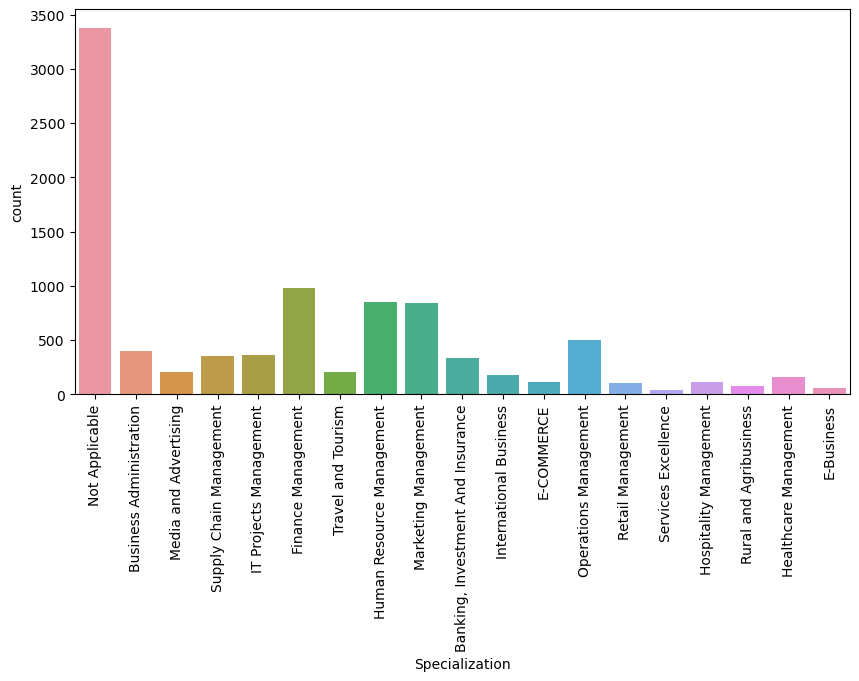

In [117]:
# Plotting count plot of 'Specialization' to see the data distribution:-

plt.figure(figsize=(10,5))
sns.countplot(x=Lscs_df['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [123]:
#Checking the values of Specialization column in percentage

100*Lscs_df.Specialization.value_counts(normalize=True,dropna=False)

Not Applicable                       36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [124]:
#imputing the null values in the Specialization column with the mode

Lscs_df.Specialization.fillna(Lscs_df.Specialization.mode()[0],inplace=True)

In [125]:
Lscs_df['What is your current occupation'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Unemployed
1       Unemployed
2          Student
3       Unemployed
4       Unemployed
           ...    
9235    Unemployed
9236    Unemployed
9237    Unemployed
9238           NaN
9239    Unemployed
Name: What is your current occupation, Length: 9240, dtype: object>

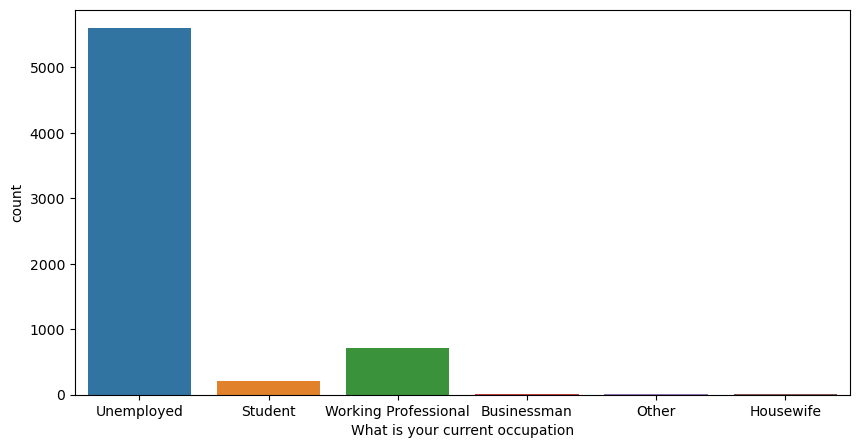

In [126]:
# Plotting count plot to check data counts in column 'What is your current occupation':-

plt.figure(figsize=(10,5))
sns.countplot(x=Lscs_df['What is your current occupation'])
plt.show()

In [127]:
#imputing the null values in the 'What is your current occupation' column with the mode

Lscs_df['What is your current occupation'].fillna(Lscs_df['What is your current occupation'].mode()[0],inplace=True)

In [128]:
Lscs_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

**dropping this because choosing a course has "Better Career Prospects" 6528 times while the other two levels appear once twice and once respectively.



In [129]:
# dropping above mentioned column

Lscs_df.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [130]:
# Check the number of null values again

Lscs_df.isnull().sum()


Lead Origin                                0
Lead Source                               36
Do Not Email                               0
Do Not Call                                0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Specialization                             0
What is your current occupation            0
Search                                     0
Magazine                                   0
Newspaper Article                          0
X Education Forums                         0
Newspaper                                  0
Digital Advertisement                      0
Through Recommendations                    0
Receive More Updates About Our Courses     0
Update me on Supply Chain Content          0
Get updates on DM Content                  0
dtype: int64

**better to drop 36 values

In [134]:
# Drop the null values rows in the column 'Lead Source'

Lscs_df = Lscs_df[~pd.isnull(Lscs_df['Lead Source'])]

In [135]:
# Recheck the number of null values 

Lscs_df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Specialization                            0
What is your current occupation           0
Search                                    0
Magazine                                  0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
Receive More Updates About Our Courses    0
Update me on Supply Chain Content         0
Get updates on DM Content                 0
dtype: int64

**Data is clean with no nulls


# Exploratory Data Analysis(EDA)

In [137]:
# Displaying head of 'lead_df1' dataframe

Lscs_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content
0,API,Olark Chat,No,No,0,0.0,0,0.0,Not Applicable,Unemployed,No,No,No,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Not Applicable,Unemployed,No,No,No,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,Student,No,No,No,No,No,No,No,No,No,No
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Not Applicable,Unemployed,No,No,No,No,No,No,No,No,No,No


In [138]:
#separating the data into numerical and categorical variables

numeric_data = Lscs_df.select_dtypes(include=[np.number])
categorical_data = Lscs_df.select_dtypes(exclude=[np.number])

numeric_data
categorical_data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content
0,API,Olark Chat,No,No,Not Applicable,Unemployed,No,No,No,No,No,No,No,No,No,No
1,API,Organic Search,No,No,Not Applicable,Unemployed,No,No,No,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,Business Administration,Student,No,No,No,No,No,No,No,No,No,No
3,Landing Page Submission,Direct Traffic,No,No,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,Not Applicable,Unemployed,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,IT Projects Management,Unemployed,No,No,No,No,No,No,No,No,No,No
9236,Landing Page Submission,Direct Traffic,No,No,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No
9237,Landing Page Submission,Direct Traffic,Yes,No,Business Administration,Unemployed,No,No,No,No,No,No,No,No,No,No
9238,Landing Page Submission,Google,No,No,Human Resource Management,Unemployed,No,No,No,No,No,No,No,No,No,No


# Numerical Analysis

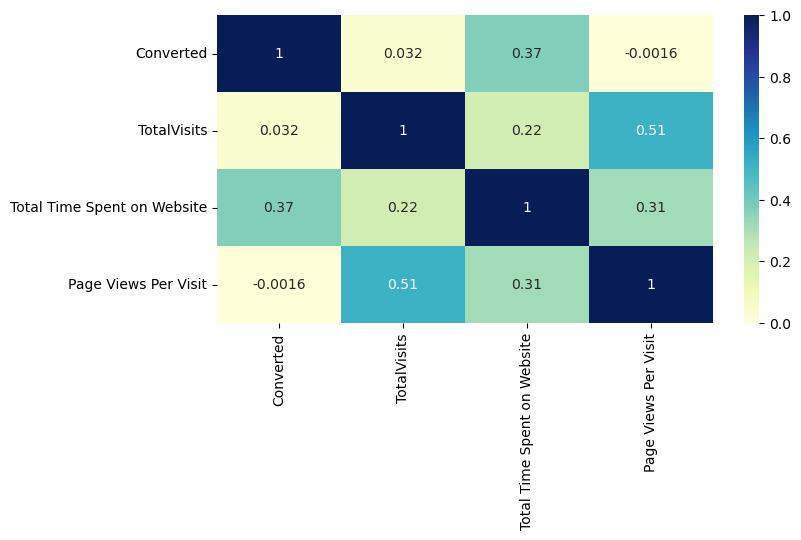

In [139]:
#Checking correlations of numeric values
# figure size

plt.figure(figsize=(8,4))

# heatmap

sns.heatmap(Lscs_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [140]:
#Check the % of Data that has Converted Values = 1

Converted = (sum(Lscs_df['Converted'])/len(Lscs_df['Converted'].index))*100
Converted

38.374619730551935

**'Converted' is our target variable.

**0: Not converted into lead, 1: Lead has been successfully Converted.

# UNIVARIATE ALAYSIS

In [141]:
#Checking value count of target variable 'Converted'

Lscs_df.Converted.value_counts()

0    5672
1    3532
Name: Converted, dtype: int64

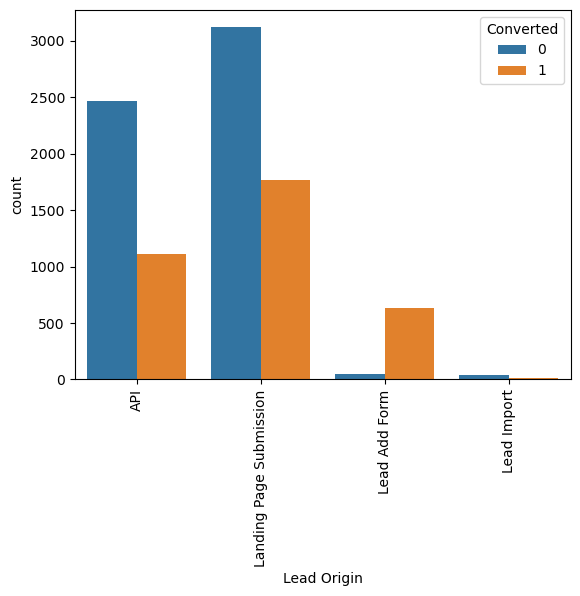

In [142]:
# Plotting count plot of 'Lead Origin' for both 'Converted' 0 and 1 :-

s1=sns.countplot(x = "Lead Origin", hue = "Converted", data = Lscs_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**we need to focus more on improving lead conversion of API and Landing Page Submission origin to improve overall conversion rate

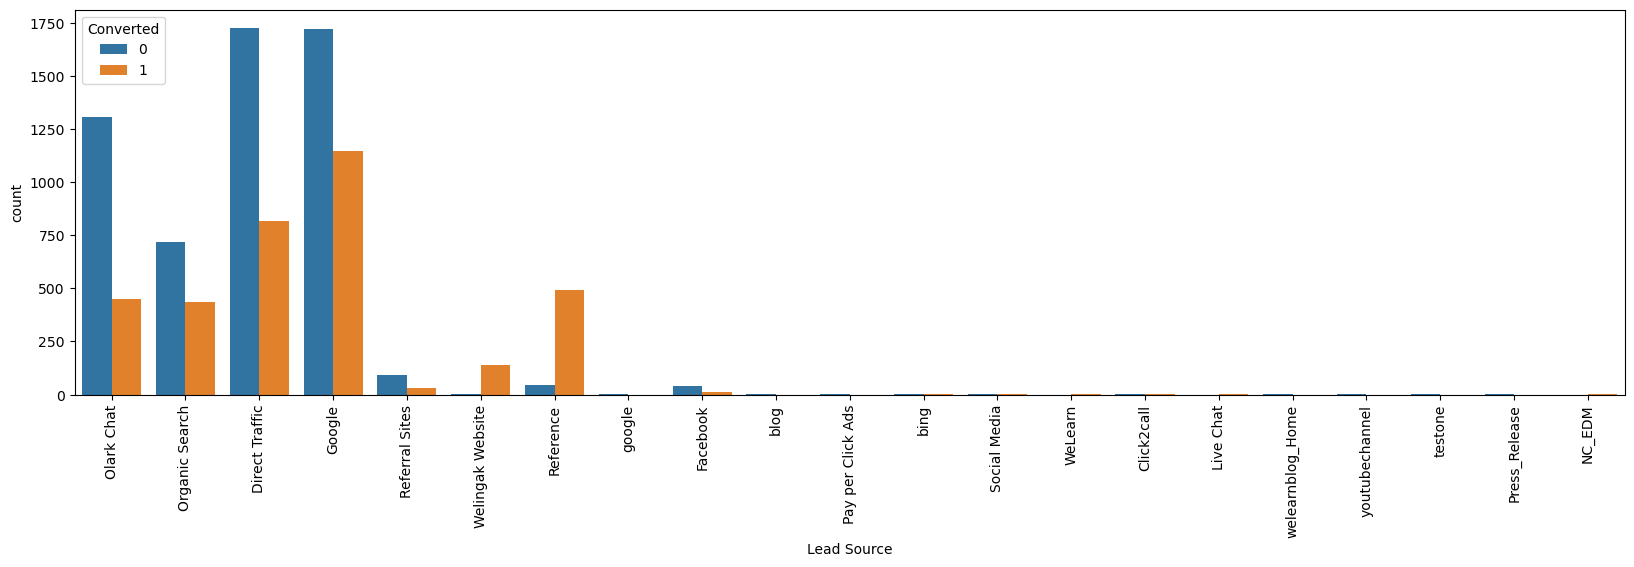

In [143]:
# Plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1 
fig, axs = plt.subplots(figsize = (20,5))
s2=sns.countplot(x = "Lead Source", hue = "Converted", data = Lscs_df)
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
plt.show()

In [144]:
#combining low frequency values into "others"

Lscs_df['Lead Source'] = Lscs_df['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel','testone',
                                                           'Press_Release','NC_EDM'], 'Others')

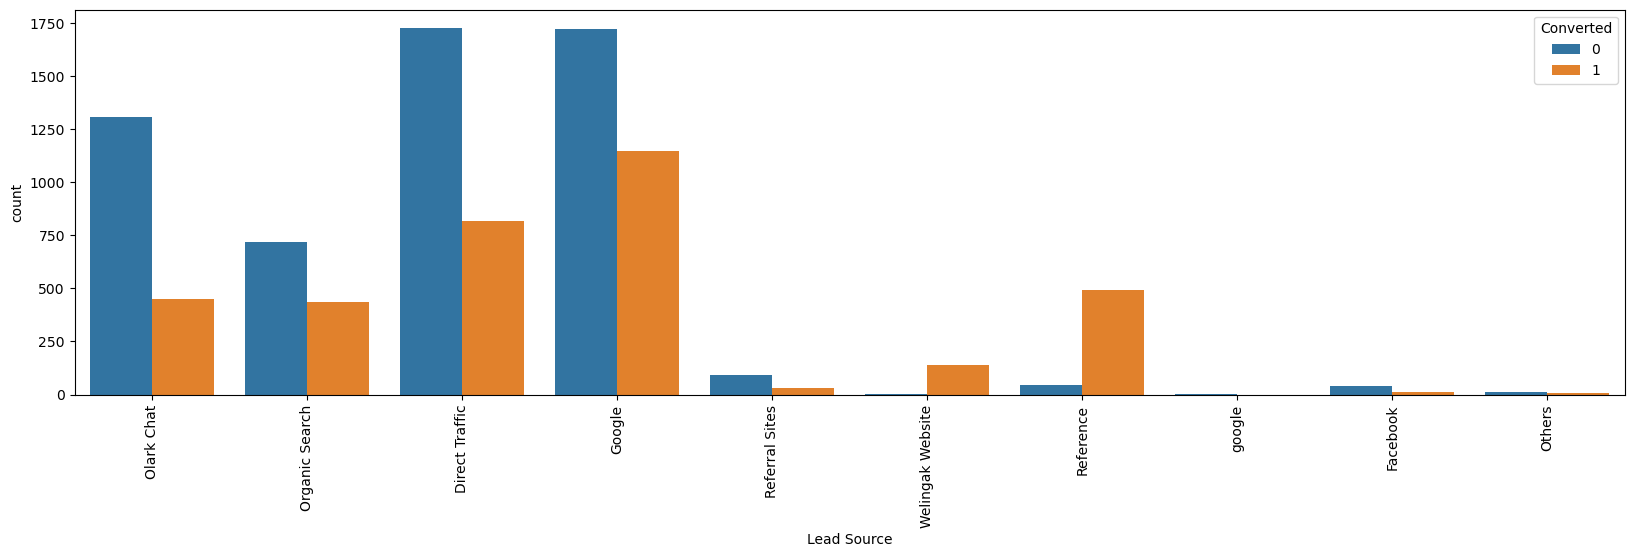

In [145]:
# Again Plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1

fig, axs = plt.subplots(figsize = (20,5))
s2=sns.countplot(x = "Lead Source", hue = "Converted", data = Lscs_df)
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
plt.show()

# Bivariate Analysis

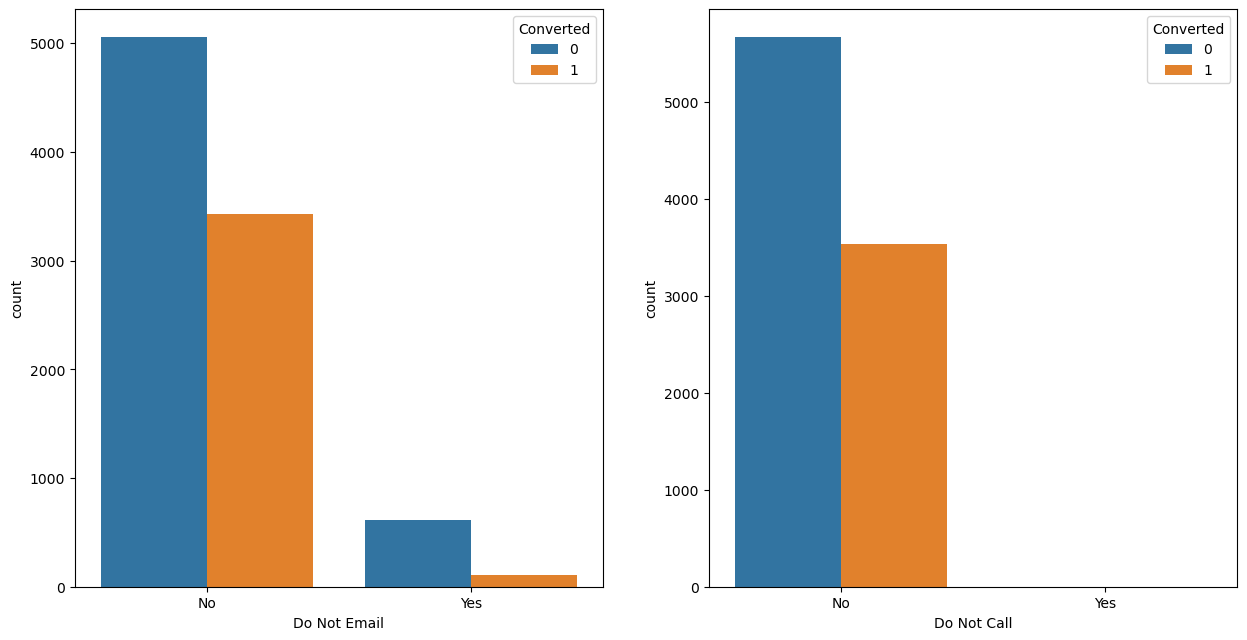

In [147]:
#plotting "count vs donot email" and "count vs donot call"

fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = Lscs_df, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = Lscs_df, ax = axs[1])
plt.show()

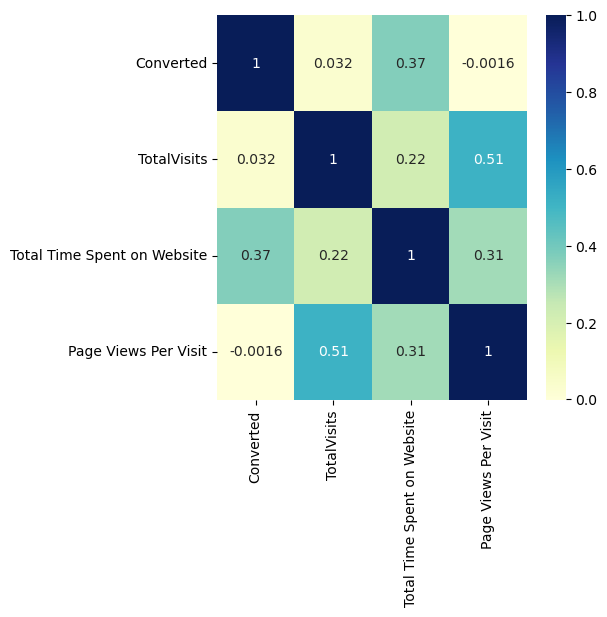

In [149]:
#correlation between all set of usable columns

plt.figure(figsize=(5, 5))
sns.heatmap(Lscs_df.corr(), cmap="YlGnBu",annot=True)
plt.show()

# Outlier Analysis and treatment

In [150]:
Lscs_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9204.000000
mean        3.449587
std         4.824662
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

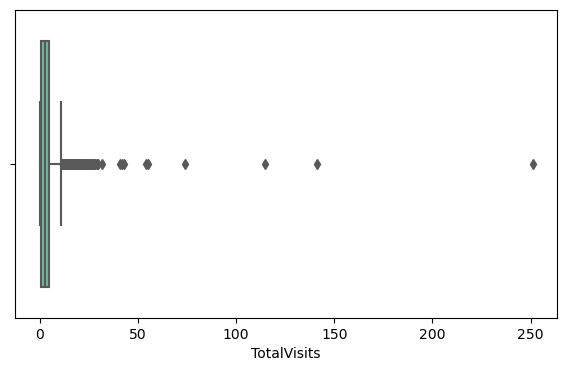

In [151]:
# Plotting box plots to visualize data distribution of 'TotalVisits'

plt.figure(figsize = (7,4))
sns.boxplot(Lscs_df['TotalVisits'],orient='v',palette='Set2')
plt.show()

**There is an outlier in the TotalVisits so we can treat them as Remove top & bottom 1% of the Column Outlier values



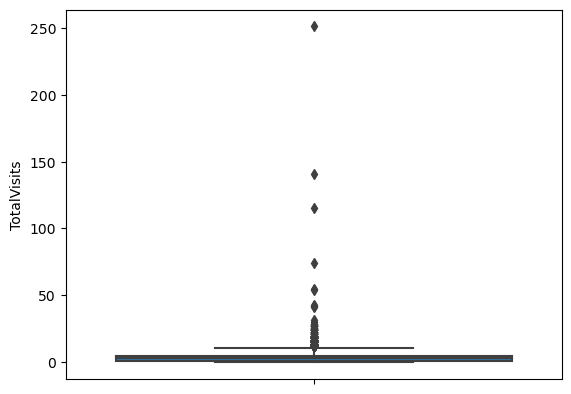

In [152]:
Q3 = Lscs_df.TotalVisits.quantile(0.99)
leads =Lscs_df[(Lscs_df.TotalVisits <= Q3)]
Q1 = Lscs_df.TotalVisits.quantile(0.01)
leads =Lscs_df[(Lscs_df.TotalVisits >= Q1)]
sns.boxplot(y=Lscs_df['TotalVisits'])
plt.show()

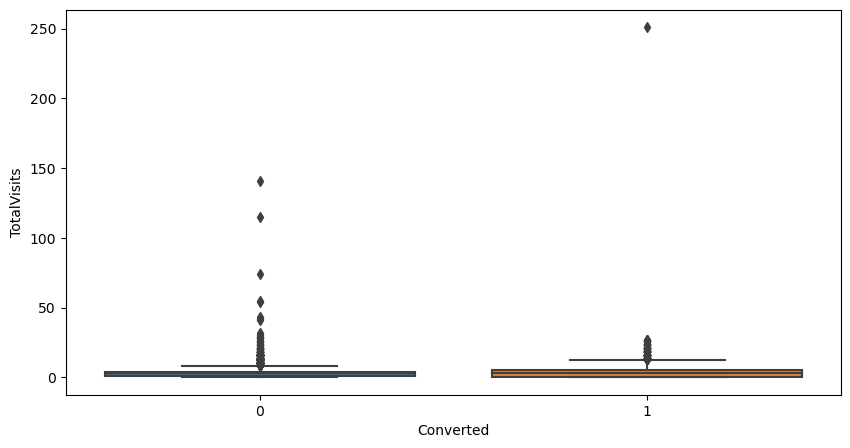

In [153]:
# Plotting box of "Total Visits vs Converted variable"

plt.figure(figsize=(10,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = Lscs_df)
plt.show()

In [154]:
Lscs_df['Total Time Spent on Website'].describe()

count    9204.000000
mean      489.005541
std       547.980340
min         0.000000
25%        14.000000
50%       250.000000
75%       938.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

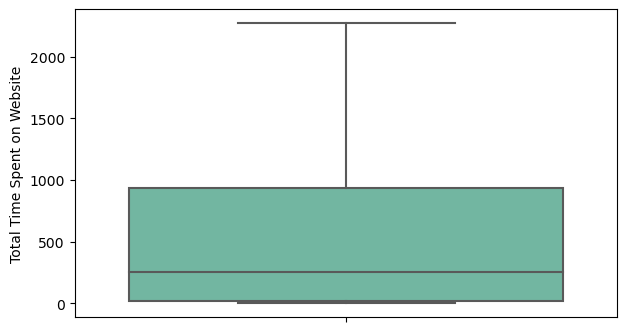

In [157]:
# Plotting box plots to visualize data distribution of Total Time Spent on Website

plt.figure(figsize=(7,4))
sns.boxplot(y=Lscs_df['Total Time Spent on Website'],orient='v',palette='Set2')
plt.show()

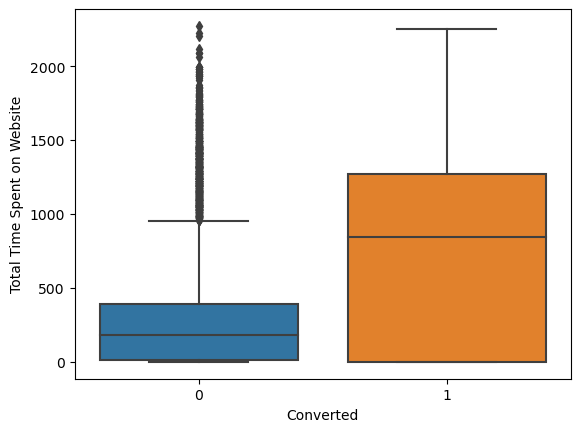

In [159]:
#plotting Total Time Spent on Website vs converted

sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = Lscs_df)
plt.show()

In [54]:
Lscs_df['Page Views Per Visit'].describe()

count    9204.000000
mean        2.364923
std         2.145999
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

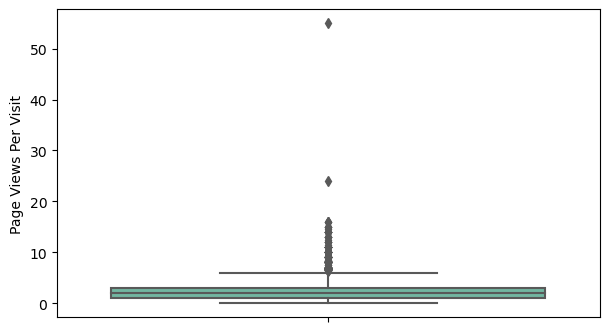

In [160]:
# Plotting 'Page Views Per Visit

plt.figure(figsize=(7,4))
sns.boxplot(y=Lscs_df['Page Views Per Visit'],orient='v',palette='Set2')
plt.show()

**there are a number of outliers in the data so We will cap the outliers to 95% value for analysis.

In [161]:
# Treating upper range outliers by capping upper range to 0.95

Q3 = Lscs_df['Page Views Per Visit'].quantile(0.95)

Lscs_df = Lscs_df[(Lscs_df['Page Views Per Visit'] <= Q3)]

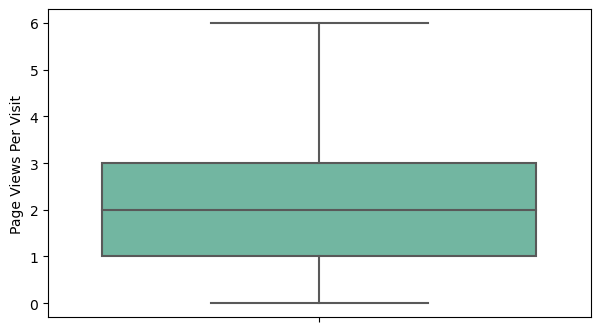

In [162]:
# Verifying outliers after removing it

plt.figure(figsize = (7,4))
sns.boxplot(y=Lscs_df['Page Views Per Visit'],palette='Set2')
plt.show()

# Data Preparation


In [163]:
#Converting Binary variables (Yes/No) to 1/0
#List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list

Lscs_df[varlist] = Lscs_df[varlist].apply(binary_map)

In [164]:
#Again getting categorical columns

cat_cols= Lscs_df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content'], dtype='object')

In [165]:
# Create dummy variables 

dummy = pd.get_dummies(Lscs_df[['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content']], drop_first=True) 
                               
# Add the results to the master dataframe

Lscs_df = pd.concat([Lscs_df, dummy], axis=1)

In [166]:
# Drop the variables for which the dummy variables have been created

Lscs_df = Lscs_df.drop(['Lead Origin', 'Lead Source','Specialization','Magazine','Newspaper','Digital Advertisement','What is your current occupation'], 1)              

In [167]:
# Let's take a look at the dataset again

Lscs_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Applicable,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes
0,0,0,0,0.0,0,0.0,No,No,No,No,No,No,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,No,No,No,No,No,No,No,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,No,No,No,No,No,No,No,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,No,No,No,No,No,No,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,No,No,No,No,No,No,No,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [168]:
#dropping unnecessary columns

Lscs_df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content'],axis=1,inplace=True)


In [169]:
Lscs_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Applicable,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [170]:
Lscs_df.shape

(8844, 46)

# Test-Train Split

In [171]:
# Put all the feature variables in X

# Putting target variable in y

y = Lscs_df['Converted']
y.head()

X=Lscs_df.drop('Converted', axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Applicable,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [172]:
# Put the target variable in y

y = Lscs_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [173]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [174]:
# Checking shape of 'X_train' dataset after splitting:-

X_train.shape

(6190, 45)

In [175]:
# Checking shape of 'X_test' dataset after splitting:-

X_test.shape

(2654, 45)

In [176]:
# Verifying info of data set after splitting:-

Lscs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8844 entries, 0 to 9239
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8844 non-null   int64  
 1   Converted                                             8844 non-null   int64  
 2   TotalVisits                                           8844 non-null   float64
 3   Total Time Spent on Website                           8844 non-null   int64  
 4   Page Views Per Visit                                  8844 non-null   float64
 5   Lead Origin_Landing Page Submission                   8844 non-null   uint8  
 6   Lead Origin_Lead Add Form                             8844 non-null   uint8  
 7   Lead Origin_Lead Import                               8844 non-null   uint8  
 8   Lead Source_Facebook                                  8844

#  Feature Scaling


In [177]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [178]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Applicable,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes
8152,1,0.015936,0.089349,0.666667,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7149,1,0.007968,0.180458,0.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7256,0,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3904,0,0.011952,0.559859,0.500000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6403,0,0.031873,0.546215,0.266667,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [179]:
# Checking the Churn Rate
Converted = (sum(Lscs_df['Converted'])/len(Lscs_df['Converted'].index))*100
Converted

38.37630031659882

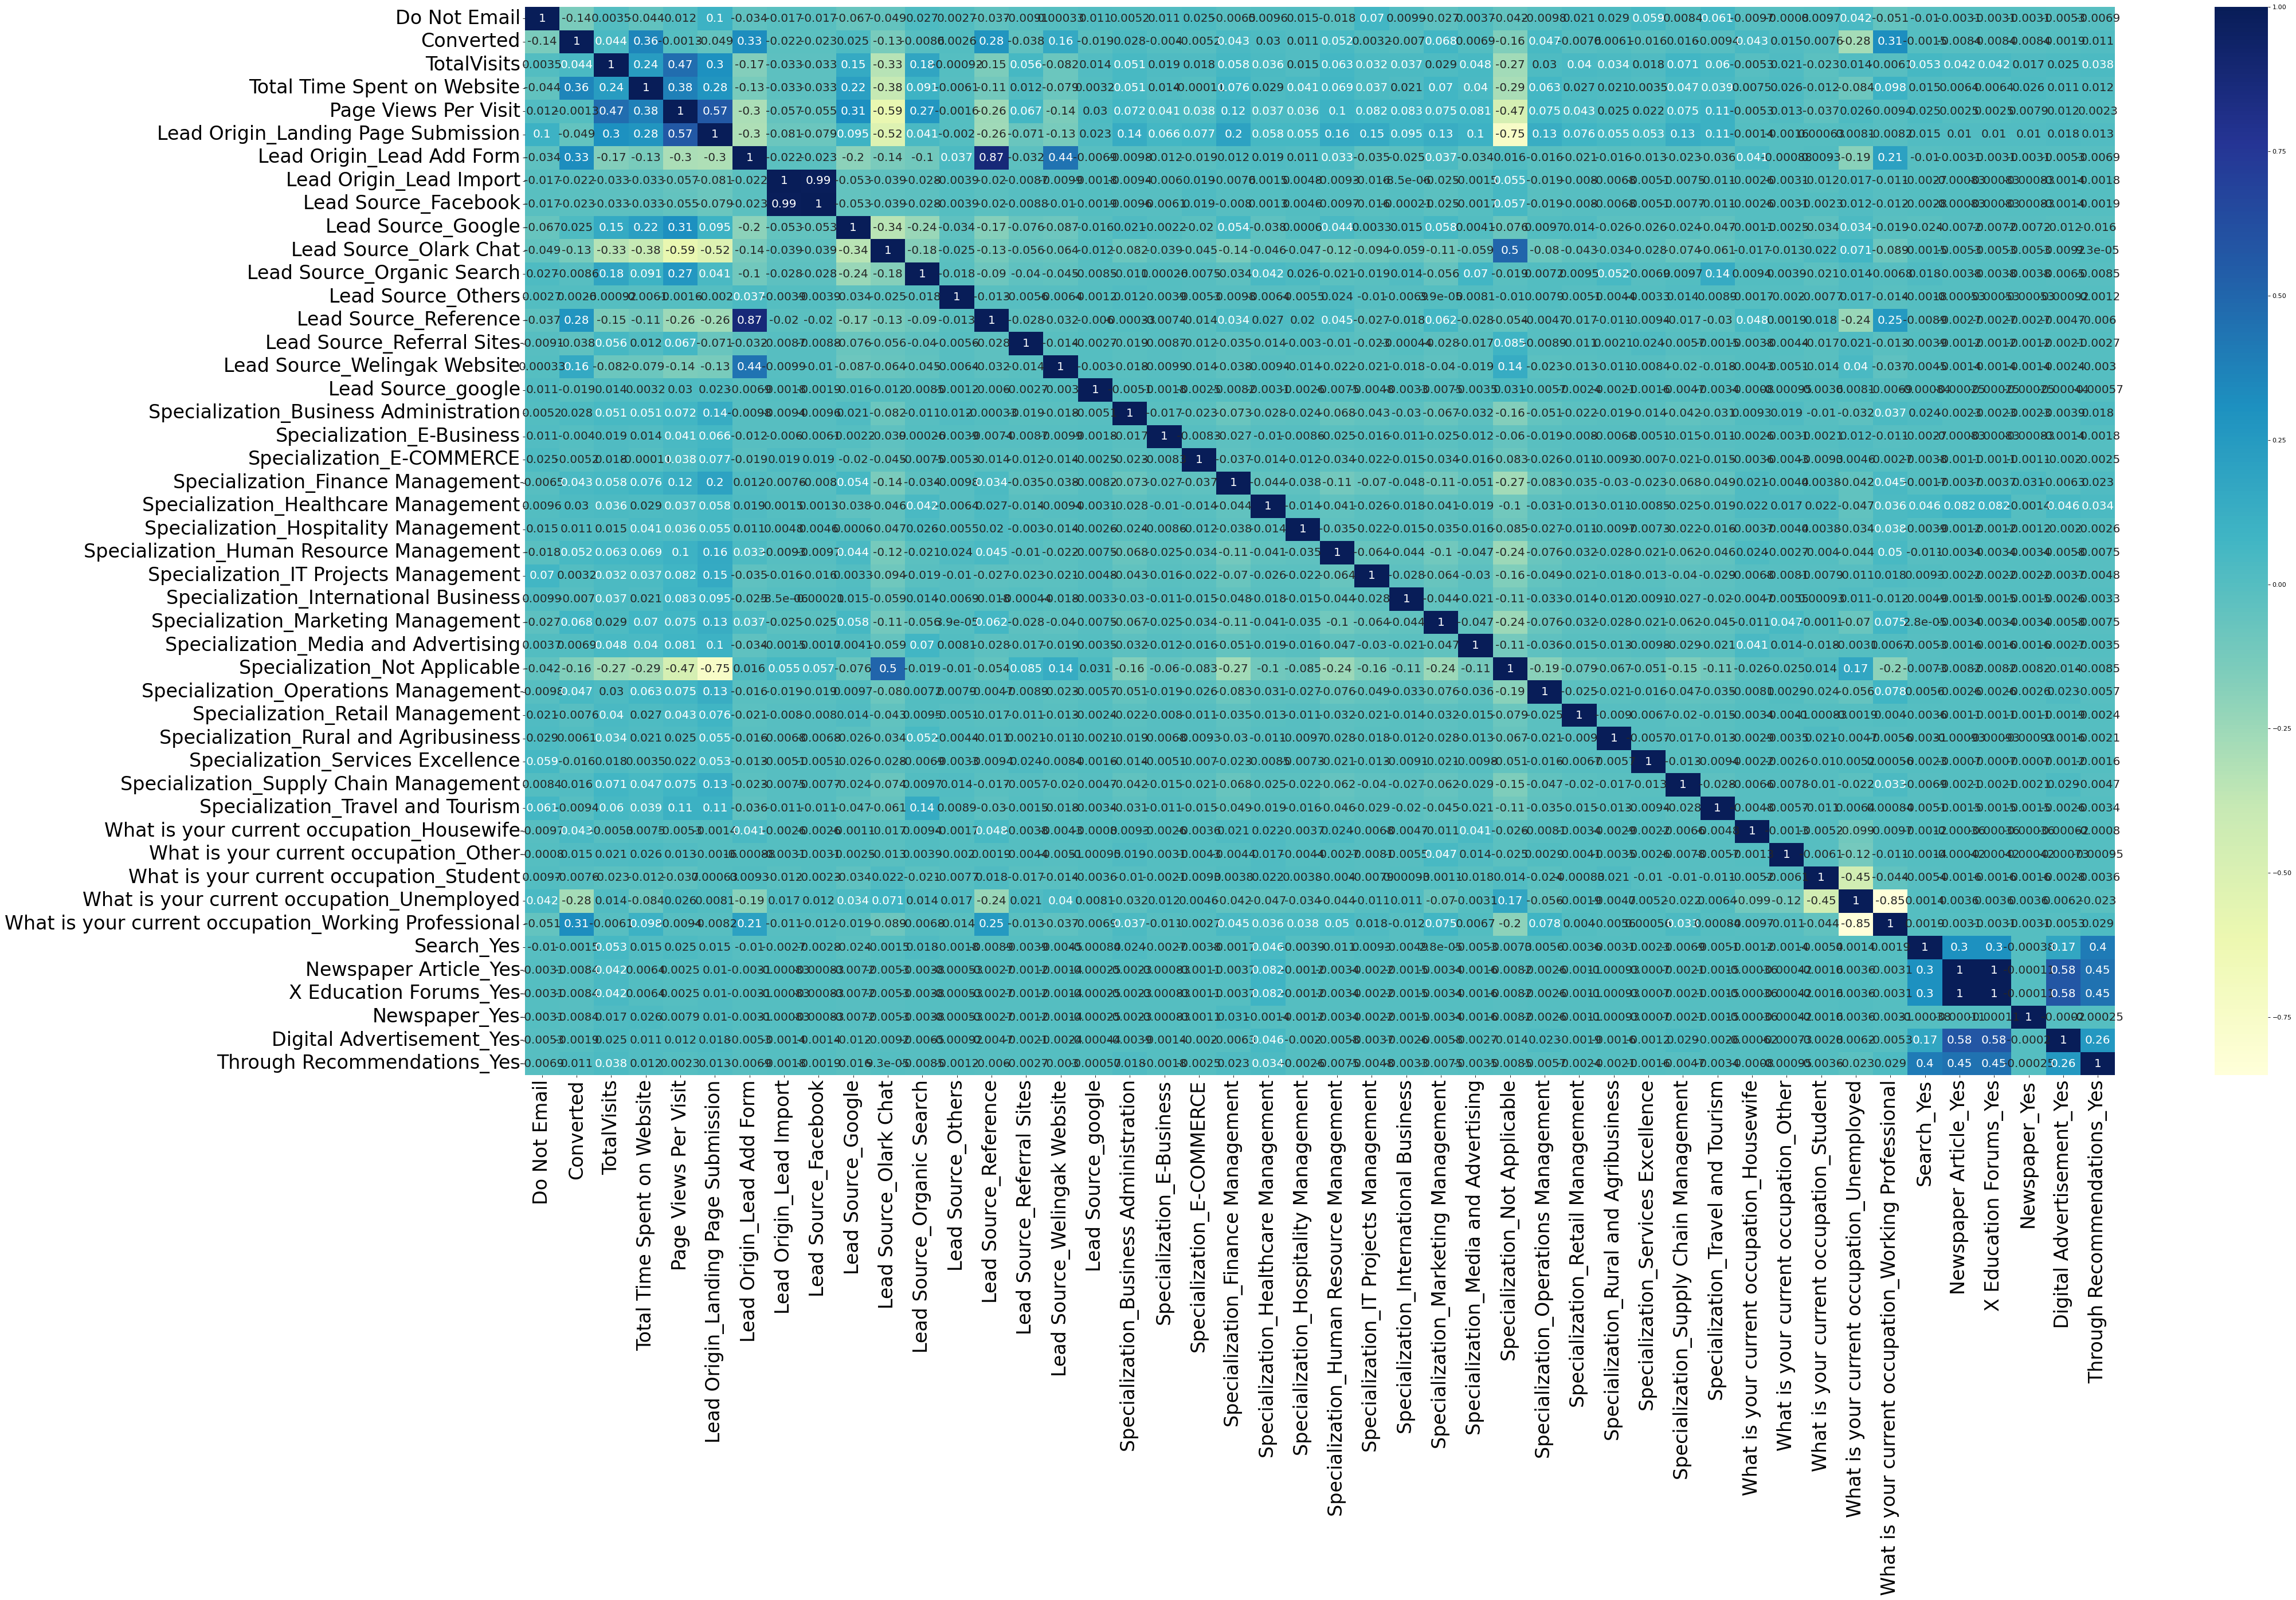

In [181]:
# Let's check the correlation coefficients to see which variables are highly correlated:-

plt.figure(figsize = (55, 35),dpi=80)
sns.heatmap(Lscs_df.corr(), annot = True, cmap="YlGnBu",annot_kws={"size": 18})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

# Model Building
Model Building using Stats Model & RFE

**There are a lot of variables present in the dataset for that we cannot deal with all. So thet the best way is to approach this, is to select a small set of features from this total data of variables using RFE method.

In [182]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Using RFE for feature elimination

In [183]:
# Import RFE and select 15 variables(our choice)

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [184]:
#features selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Source_Facebook', False, 7),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Others', False, 29),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_google', False, 11),
 ('Specialization_Business Administration', False, 20),
 ('Specialization_E-Business', False, 2),
 ('Specialization_E-COMMERCE', False, 25),
 ('Specialization_Finance Management', False, 22),
 ('Specialization_Healthcare Management', False, 18),
 ('Specialization_Hospitality Management', False, 3),
 ('Specialization_Human Resource Management', False, 23),
 ('Specialization_IT Pro

In [185]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Referral Sites', 'Lead Source_Welingak Website', 'Specialization_Not Applicable', 'What is your current occupation_Housewife', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Search_Yes', 'Newspaper_Yes'], dtype='object')

In [186]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Others', 'Lead Source_Reference', 'Lead Source_google', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Hospitality Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_International Business', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Retail Management', 'Specialization_Rural and Agribusiness', 'Specialization_Services Excellence', 'Specialization_Supply Chain Management', 'Specialization_Travel and Tourism', 'What is your current occupation_Other', 'Newspaper Article_Yes', 'X Education Forums_Yes', 'Digital Advertisement_Yes',
       'Through Rec

# Assessing the model with statsmodel

In [187]:
# Import statsmodels

import statsmodels.api as sm

In [188]:
# Select only the columns selected by RFE

X_train = X_train[col]

# Model 1

In [189]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
reslscs = logm1.fit()
reslscs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6190
Model:                            GLM   Df Residuals:                     6174
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2840.3
Date:                Mon, 17 Apr 2023   Deviance:                       5680.7
Time:                        12:21:48   Pearson chi2:                 7.68e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3401
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9134      0.628     -1.456      0.146      -2.143       0.317
Do Not Email                                            -1.3846      0.163     -8.474      0.000      -1.705      -1.064
TotalVisits                                             10.5679      2.921      3.617      0.000       4.842      16.294
Total Time Spent on Website                              4.4972      0.161     28.004      0.000       4.182       4.812
Lead Origin_Landing Page Submission                     -0.9858      0.124     -7.946      0.000      -1.229      -0.743
Lead Origin_Lead Add Form                                3.5034      0.222     15.808      0.000       3.069       3.938
Lead Source_Olark Chat                                   0.9015      0.120      7.541      0.000       0.667       1.136
Lead Source_Referral Sites                              -0.6478      0.321     -2.015      0.044      -1.278      -0.018
Lead Source_Welingak Website                            23.2863   1.25e+04      0.002      0.999   -2.45e+04    2.45e+04
Specialization_Not Applicable                           -1.1614      0.119     -9.789      0.000      -1.394      -0.929
What is your current occupation_Housewife               24.3093   3.96e+04      0.001      1.000   -7.76e+04    7.76e+04
What is your current occupation_Student                 -0.0709      0.648     -0.109      0.913      -1.342       1.200
What is your current occupation_Unemployed              -0.2695      0.615     -0.438      0.661      -1.475       0.936
What is your current occupation_Working Professional     2.3714      0.641      3.697      0.000       1.114       3.629
Search_Yes                                              -1.2424      1.096     -1.133      0.257      -3.391       0.906
Newspaper_Yes                                          -26.4052   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
========================================================================================================================
"""

# VIF Check for multicollinearity 

In [190]:
# Creating dataframe called 'vif' containing names feature variables and their respective VIFs:-

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,14.06
3,Lead Origin_Landing Page Submission,7.15
8,Specialization_Not Applicable,4.63
5,Lead Source_Olark Chat,2.38
2,Total Time Spent on Website,2.22
4,Lead Origin_Lead Add Form,2.00
12,What is your current occupation_Working Profes...,1.95
1,TotalVisits,1.75
10,What is your current occupation_Student,1.38
7,Lead Source_Welingak Website,1.31


# Dropping insignificant column and updating the model

In [191]:
#Dropping 'What is your current occupation_Housewife' because of insignificant variable p-value=1.0(p>0.05):-

X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

# MODEL 2

In [192]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6190
Model:                            GLM   Df Residuals:                     6175
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2843.4
Date:                Mon, 17 Apr 2023   Deviance:                       5686.8
Time:                        12:22:44   Pearson chi2:                 7.67e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3394
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2529      0.577     -0.439      0.661      -1.383       0.877
Do Not Email                                            -1.3886      0.164     -8.490      0.000      -1.709      -1.068
TotalVisits                                             10.4194      2.919      3.569      0.000       4.697      16.141
Total Time Spent on Website                              4.4894      0.160     27.980      0.000       4.175       4.804
Lead Origin_Landing Page Submission                     -0.9816      0.124     -7.917      0.000      -1.225      -0.739
Lead Origin_Lead Add Form                                3.5020      0.222     15.806      0.000       3.068       3.936
Lead Source_Olark Chat                                   0.8971      0.120      7.507      0.000       0.663       1.131
Lead Source_Referral Sites                              -0.6462      0.321     -2.011      0.044      -1.276      -0.016
Lead Source_Welingak Website                            23.2853   1.25e+04      0.002      0.999   -2.45e+04    2.45e+04
Specialization_Not Applicable                           -1.1603      0.119     -9.786      0.000      -1.393      -0.928
What is your current occupation_Student                 -0.7293      0.599     -1.218      0.223      -1.903       0.444
What is your current occupation_Unemployed              -0.9276      0.563     -1.649      0.099      -2.030       0.175
What is your current occupation_Working Professional     1.7122      0.591      2.897      0.004       0.554       2.871
Search_Yes                                              -1.2387      1.095     -1.131      0.258      -3.386       0.908
Newspaper_Yes                                          -26.3995   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
========================================================================================================================
"""

In [193]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,13.92
3,Lead Origin_Landing Page Submission,7.09
8,Specialization_Not Applicable,4.61
5,Lead Source_Olark Chat,2.37
2,Total Time Spent on Website,2.21
4,Lead Origin_Lead Add Form,1.98
11,What is your current occupation_Working Profes...,1.94
1,TotalVisits,1.75
9,What is your current occupation_Student,1.38
7,Lead Source_Welingak Website,1.31


In [194]:
# Droping `What is your current occupation_Unemployed`.
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

# Model 3

In [195]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6190
Model:                            GLM   Df Residuals:                     6176
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2844.8
Date:                Mon, 17 Apr 2023   Deviance:                       5689.7
Time:                        12:22:54   Pearson chi2:                 7.70e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3391
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1740      0.138     -8.484      0.000      -1.445      -0.903
Do Not Email                                            -1.3869      0.163     -8.494      0.000      -1.707      -1.067
TotalVisits                                             10.4691      2.921      3.584      0.000       4.745      16.194
Total Time Spent on Website                              4.4943      0.160     28.016      0.000       4.180       4.809
Lead Origin_Landing Page Submission                     -0.9865      0.124     -7.962      0.000      -1.229      -0.744
Lead Origin_Lead Add Form                                3.5069      0.221     15.836      0.000       3.073       3.941
Lead Source_Olark Chat                                   0.8987      0.119      7.521      0.000       0.664       1.133
Lead Source_Referral Sites                              -0.6495      0.321     -2.021      0.043      -1.279      -0.020
Lead Source_Welingak Website                            23.2796   1.25e+04      0.002      0.999   -2.45e+04    2.45e+04
Specialization_Not Applicable                           -1.1672      0.119     -9.849      0.000      -1.399      -0.935
What is your current occupation_Student                  0.1949      0.210      0.928      0.354      -0.217       0.607
What is your current occupation_Working Professional     2.6356      0.189     13.958      0.000       2.265       3.006
Search_Yes                                              -1.2449      1.096     -1.136      0.256      -3.392       0.903
Newspaper_Yes                                          -26.4070   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
========================================================================================================================
"""

In [196]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_Not Applicable,2.17
3,Lead Origin_Landing Page Submission,2.15
2,Total Time Spent on Website,1.95
5,Lead Source_Olark Chat,1.84
1,TotalVisits,1.65
4,Lead Origin_Lead Add Form,1.40
7,Lead Source_Welingak Website,1.29
10,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.10
6,Lead Source_Referral Sites,1.04


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with Newspaper_Yes

In [197]:
# The column Newspaper_Yes seems to have high p-value
X_train.drop(['Newspaper_Yes'],1,inplace=True)

# Model 4

In [198]:
# Refit the model with the new set of features

logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6190
Model:                            GLM   Df Residuals:                     6177
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2846.8
Date:                Mon, 17 Apr 2023   Deviance:                       5693.6
Time:                        12:23:05   Pearson chi2:                 7.69e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3387
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1681      0.138     -8.446      0.000      -1.439      -0.897
Do Not Email                                            -1.3852      0.163     -8.487      0.000      -1.705      -1.065
TotalVisits                                             10.3106      2.919      3.532      0.000       4.589      16.033
Total Time Spent on Website                              4.4839      0.160     27.984      0.000       4.170       4.798
Lead Origin_Landing Page Submission                     -0.9881      0.124     -7.979      0.000      -1.231      -0.745
Lead Origin_Lead Add Form                                3.5015      0.221     15.816      0.000       3.068       3.935
Lead Source_Olark Chat                                   0.8936      0.119      7.483      0.000       0.660       1.128
Lead Source_Referral Sites                              -0.6484      0.321     -2.019      0.044      -1.278      -0.019
Lead Source_Welingak Website                            23.2795   1.25e+04      0.002      0.999   -2.45e+04    2.45e+04
Specialization_Not Applicable                           -1.1677      0.118     -9.857      0.000      -1.400      -0.936
What is your current occupation_Student                  0.1957      0.210      0.932      0.351      -0.216       0.607
What is your current occupation_Working Professional     2.6357      0.189     13.962      0.000       2.266       3.006
Search_Yes                                              -1.2396      1.095     -1.132      0.258      -3.386       0.907
========================================================================================================================
"""

In [199]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_Not Applicable,2.17
3,Lead Origin_Landing Page Submission,2.15
2,Total Time Spent on Website,1.95
5,Lead Source_Olark Chat,1.84
1,TotalVisits,1.65
4,Lead Origin_Lead Add Form,1.40
7,Lead Source_Welingak Website,1.29
10,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.10
6,Lead Source_Referral Sites,1.04


In [200]:
# The column Lead Source_Welingak Website seems to have high p-value
X_train.drop(['Lead Source_Welingak Website'],1,inplace=True)

# Model 5

In [201]:
# Refit the model with the new set of features

logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6190
Model:                            GLM   Df Residuals:                     6178
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2865.3
Date:                Mon, 17 Apr 2023   Deviance:                       5730.5
Time:                        12:23:09   Pearson chi2:                 9.18e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3347
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2253      0.139     -8.842      0.000      -1.497      -0.954
Do Not Email                                            -1.3410      0.159     -8.437      0.000      -1.653      -1.030
TotalVisits                                             10.4357      2.914      3.581      0.000       4.725      16.147
Total Time Spent on Website                              4.4772      0.160     27.970      0.000       4.163       4.791
Lead Origin_Landing Page Submission                     -0.9338      0.124     -7.545      0.000      -1.176      -0.691
Lead Origin_Lead Add Form                                4.1146      0.215     19.096      0.000       3.692       4.537
Lead Source_Olark Chat                                   0.8891      0.119      7.468      0.000       0.656       1.122
Lead Source_Referral Sites                              -0.6532      0.321     -2.036      0.042      -1.282      -0.024
Specialization_Not Applicable                           -1.0949      0.119     -9.220      0.000      -1.328      -0.862
What is your current occupation_Student                  0.1850      0.210      0.879      0.379      -0.227       0.598
What is your current occupation_Working Professional     2.6289      0.189     13.932      0.000       2.259       2.999
Search_Yes                                              -1.2235      1.091     -1.122      0.262      -3.362       0.914
========================================================================================================================
"""

In [202]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,2.15
7,Specialization_Not Applicable,2.12
2,Total Time Spent on Website,1.95
5,Lead Source_Olark Chat,1.83
1,TotalVisits,1.64
9,What is your current occupation_Working Profes...,1.17
4,Lead Origin_Lead Add Form,1.16
0,Do Not Email,1.10
6,Lead Source_Referral Sites,1.04
8,What is your current occupation_Student,1.03


In [203]:
# The column Search_Yes	 seems to have low p-value and low vif
X_train.drop(['Search_Yes'],1,inplace=True)

# Model 6

In [204]:
# Refit the model with the new set of features

logm6 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6190
Model:                            GLM   Df Residuals:                     6179
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2866.0
Date:                Mon, 17 Apr 2023   Deviance:                       5731.9
Time:                        12:23:13   Pearson chi2:                 9.17e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3346
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2250      0.138     -8.846      0.000      -1.496      -0.954
Do Not Email                                            -1.3395      0.159     -8.429      0.000      -1.651      -1.028
TotalVisits                                             10.2370      2.909      3.519      0.000       4.535      15.939
Total Time Spent on Website                              4.4768      0.160     27.972      0.000       4.163       4.790
Lead Origin_Landing Page Submission                     -0.9323      0.124     -7.539      0.000      -1.175      -0.690
Lead Origin_Lead Add Form                                4.1130      0.215     19.092      0.000       3.691       4.535
Lead Source_Olark Chat                                   0.8873      0.119      7.453      0.000       0.654       1.121
Lead Source_Referral Sites                              -0.6511      0.321     -2.030      0.042      -1.280      -0.022
Specialization_Not Applicable                           -1.0933      0.119     -9.215      0.000      -1.326      -0.861
What is your current occupation_Student                  0.1860      0.210      0.884      0.377      -0.226       0.598
What is your current occupation_Working Professional     2.6281      0.189     13.926      0.000       2.258       2.998
========================================================================================================================
"""

In [205]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,2.15
7,Specialization_Not Applicable,2.12
2,Total Time Spent on Website,1.95
5,Lead Source_Olark Chat,1.83
1,TotalVisits,1.64
9,What is your current occupation_Working Profes...,1.17
4,Lead Origin_Lead Add Form,1.16
0,Do Not Email,1.10
6,Lead Source_Referral Sites,1.04
8,What is your current occupation_Student,1.03


In [206]:
# The column What is your current occupation_Student seems to have low p-value and low vif
X_train.drop(['What is your current occupation_Student'],1,inplace=True)

# Model 7

In [207]:
# Refit the model with the new set of features

logm7 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res=logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6190
Model:                            GLM   Df Residuals:                     6180
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2866.4
Date:                Mon, 17 Apr 2023   Deviance:                       5732.7
Time:                        12:23:17   Pearson chi2:                 9.17e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3345
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2221      0.138     -8.829      0.000      -1.493      -0.951
Do Not Email                                            -1.3400      0.159     -8.429      0.000      -1.652      -1.028
TotalVisits                                             10.2066      2.908      3.510      0.000       4.507      15.906
Total Time Spent on Website                              4.4769      0.160     27.972      0.000       4.163       4.791
Lead Origin_Landing Page Submission                     -0.9298      0.124     -7.521      0.000      -1.172      -0.687
Lead Origin_Lead Add Form                                4.1136      0.215     19.099      0.000       3.691       4.536
Lead Source_Olark Chat                                   0.8900      0.119      7.479      0.000       0.657       1.123
Lead Source_Referral Sites                              -0.6544      0.321     -2.040      0.041      -1.283      -0.026
Specialization_Not Applicable                           -1.0925      0.119     -9.206      0.000      -1.325      -0.860
What is your current occupation_Working Professional     2.6234      0.189     13.907      0.000       2.254       2.993
========================================================================================================================
"""

All the p-values are now in the appropriate range(0.05).

In [208]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,2.13
7,Specialization_Not Applicable,2.12
2,Total Time Spent on Website,1.95
5,Lead Source_Olark Chat,1.82
1,TotalVisits,1.64
8,What is your current occupation_Working Profes...,1.17
4,Lead Origin_Lead Add Form,1.15
0,Do Not Email,1.10
6,Lead Source_Referral Sites,1.04


Both the p-values and VIFs seem to be decent enough for all the variables. So let's make predictions using this final set of features.

In [209]:
# Predicting the train variables
X_train_sm = sm.add_constant(X_train)
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8152    0.050731
7149    0.068971
7256    0.193946
3904    0.577819
6403    0.649941
1292    0.947429
1308    0.152151
5089    0.686106
4471    0.100324
6738    0.199605
dtype: float64

In [210]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:9]

array([0.05073052, 0.06897077, 0.1939455 , 0.57781947, 0.64994132,
       0.94742863, 0.15215104, 0.68610575, 0.10032413])

# Creating a dataframe with the actual Converted flag and the predicted probabilities

In [211]:
# Create a new dataframe containing the actual churn flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.050731
1,0,0.068971
2,0,0.193946
3,0,0.577819
4,0,0.649941


In [212]:
#Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.050731,0
1,0,0.068971,0
2,0,0.193946,0
3,0,0.577819,1
4,0,0.649941,1


# Model Evaluation


In [213]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [214]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3349  455]
 [ 844 1542]]


# Accuracy

In [215]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7901453957996769


In [216]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# sensitivity

In [217]:
# Calculate the sensitivity

TP/(TP+FN)

0.6462699077954736

# specificity

In [218]:
# Calculate the specificity

TN/(TN+FP)

0.8803890641430073

# Plotting the ROC Curve and Finding the Optical Cutoff

In [219]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [220]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [221]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

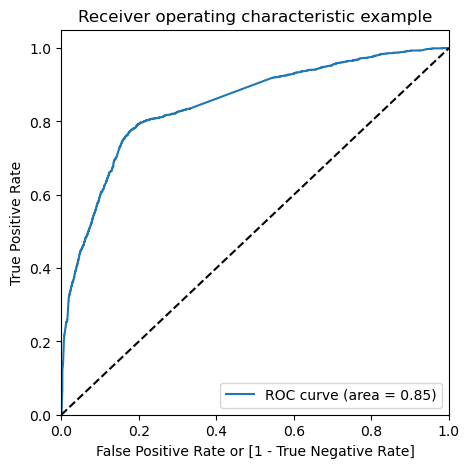

In [222]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

**The area under the ROC curve is 0.85, So it looks like we have a pretty good model. To find the cutoff, we also examine the sensitivity and the specificity of change.

In [223]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.050731,0,1,0,0,0,0,0,0,0,0,0
1,0,0.068971,0,1,0,0,0,0,0,0,0,0,0
2,0,0.193946,0,1,1,0,0,0,0,0,0,0,0
3,0,0.577819,1,1,1,1,1,1,1,0,0,0,0
4,0,0.649941,1,1,1,1,1,1,1,1,0,0,0


In [224]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385460  1.000000  0.000000
0.1   0.1  0.449435  0.990780  0.109884
0.2   0.2  0.738934  0.831517  0.680862
0.3   0.3  0.799031  0.786672  0.806782
0.4   0.4  0.803877  0.736379  0.846215
0.5   0.5  0.790145  0.646270  0.880389
0.6   0.6  0.774152  0.551551  0.913775
0.7   0.7  0.756704  0.448449  0.950053
0.8   0.8  0.733926  0.349958  0.974763
0.9   0.9  0.698869  0.235122  0.989748


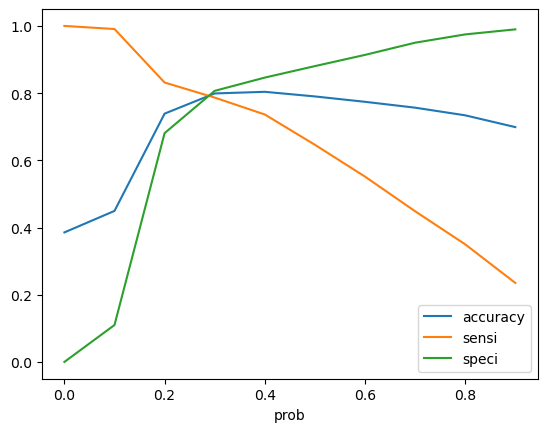

In [225]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**we get the best value of the three parameters around 0.3. Now let's choose 0.3 as our breakpoint.

In [227]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.050731,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.068971,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.193946,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.577819,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.649941,1,1,1,1,1,1,1,1,0,0,0,1


# Accuracy

In [228]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7990306946688207

In [229]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3069,  735],
       [ 509, 1877]], dtype=int64)

In [230]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [231]:
# Calculate Sensitivity

TP/(TP+FN)

0.7866722548197821

In [232]:
# Calculate Specificity

TN/(TN+FP)

0.806782334384858

# Making predictions


In [233]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [234]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Not Applicable,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper_Yes
2924,0,0.011952,0.229313,0,1,0,0,0,1,0,0,1,0,0,0
3764,0,0.011952,0.305458,1,0,0,0,0,0,0,0,1,0,0,0
2021,0,0.007968,0.149648,0,0,0,0,0,1,0,0,1,0,0,0
4924,0,0.007968,0.013204,0,0,0,0,0,1,0,0,1,0,0,0
8713,0,0.000000,0.000000,0,0,1,0,0,0,0,0,1,0,0,0


In [235]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [236]:
# Check X_test_sm

X_test_sm

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Not Applicable,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper_Yes
2924,1.0,0,0.011952,0.229313,0,1,0,0,0,1,0,0,1,0,0,0
3764,1.0,0,0.011952,0.305458,1,0,0,0,0,0,0,0,1,0,0,0
2021,1.0,0,0.007968,0.149648,0,0,0,0,0,1,0,0,1,0,0,0
4924,1.0,0,0.007968,0.013204,0,0,0,0,0,1,0,0,1,0,0,0
8713,1.0,0,0.000000,0.000000,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3974,1.0,0,0.023904,0.091549,1,0,0,0,0,0,0,0,1,0,0,0
5992,1.0,0,0.023904,0.388204,0,0,0,0,0,1,0,0,1,0,0,0
2175,1.0,0,0.031873,0.060299,1,0,0,0,0,0,0,0,1,0,0,0
426,1.0,0,0.007968,0.483715,1,0,0,0,0,1,0,0,1,0,0,0


In [237]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

X_test =X_test[X_train.columns]
y_test_pred = res.predict(sm.add_constant(X_test))

In [238]:
y_test_pred[:10]

2924    0.950152
3764    0.340205
2021    0.173173
4924    0.102096
8713    0.417744
7827    0.238861
8889    0.394800
1490    0.974820
478     0.193946
8000    0.180298
dtype: float64

In [239]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [240]:
# Let's see the head

y_pred_1.head()

,0
2924,0.950152
3764,0.340205
2021,0.173173
4924,0.102096
8713,0.417744


In [241]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [242]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [243]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [244]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.950152
1,0,0.340205
2,0,0.173173
3,1,0.102096
4,0,0.417744


In [245]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [246]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.950152
1,0,0.340205
2,0,0.173173
3,1,0.102096
4,0,0.417744


In [247]:
# Make predictions on the test set using 0.3 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [248]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1311,  335],
       [ 239,  769]], dtype=int64)

In [249]:
# Calculate sensitivity
TP / float(TP+FN)

0.7866722548197821

In [250]:
# Calculate specificity
TN / float(TN+FP)

0.806782334384858

# Precision and Recall View

### Build the training model using the precision and recall view

In [251]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3349,  455],
       [ 844, 1542]], dtype=int64)

##### Precision
TP / TP + FP

In [252]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7721582373560341

##### Recall
TP / TP + FN

In [253]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6462699077954736

### Precision and recall tradeoff

In [254]:
from sklearn.metrics import precision_recall_curve

In [255]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6185    0
 6186    0
 6187    1
 6188    1
 6189    0
 Name: Converted, Length: 6190, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6185    1
 6186    0
 6187    1
 6188    1
 6189    0
 Name: Predicted, Length: 6190, dtype: int64)

In [256]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

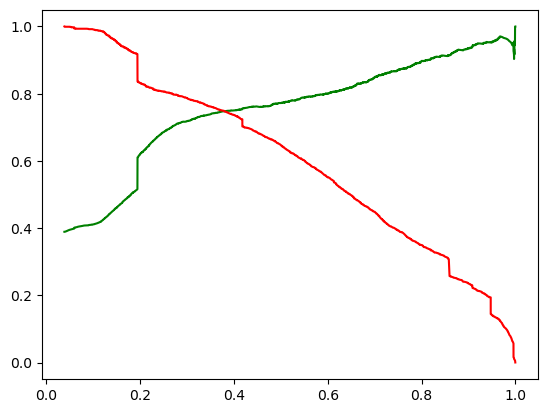

In [257]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [258]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.050731,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.068971,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.193946,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.577819,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.649941,1,1,1,1,1,1,1,1,0,0,0,1


#### Accuracy

In [259]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7990306946688207

In [260]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3069,  735],
       [ 509, 1877]], dtype=int64)

In [261]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [262]:
# Calculate Precision

TP/(TP+FP)

0.7186064318529862

In [263]:
# Calculate Recall

TP/(TP+FN)

0.7866722548197821

In [264]:
X_test.shape

(2654, 9)

In [265]:
X_train.shape

(6190, 9)

In [266]:
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Referral Sites', 'Specialization_Not Applicable', 'What is your current occupation_Working Professional'], dtype='object')

In [267]:
X_test.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Referral Sites', 'Specialization_Not Applicable', 'What is your current occupation_Working Professional'], dtype='object')

In [268]:
X_test =X_test[X_train.columns]

# Now make predicitons on the test set.

In [269]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

2924    0.950152
3764    0.340205
2021    0.173173
4924    0.102096
8713    0.417744
7827    0.238861
8889    0.394800
1490    0.974820
478     0.193946
8000    0.180298
dtype: float64

In [270]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2924,0.950152
3764,0.340205
2021,0.173173
4924,0.102096
8713,0.417744


In [271]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
2924,1
3764,0
2021,0
4924,1
8713,0


In [272]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [273]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,1,0.950152
1,0,0.340205
2,0,0.173173
3,1,0.102096
4,0,0.417744


In [274]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.950152
1,0,0.340205
2,0,0.173173
3,1,0.102096
4,0,0.417744


In [275]:
# Make predictions on the test set using 0.3 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.950152,1
1,0,0.340205,1
2,0,0.173173,0
3,1,0.102096,0
4,0,0.417744,1


In [276]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7837226827430294

In [277]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1311,  335],
       [ 239,  769]], dtype=int64)

In [278]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [279]:
# Calculate Precision

TP/(TP+FP)

0.6965579710144928

In [280]:
# Calculate Recall

TP/(TP+FN)

0.7628968253968254

# Final Observation

Evaluation Metrics for the train Dataset:-

*Accuracy :0.79
*Sensitivity:~0.78
*Specificity:0.80
*Precision: 0.72
*Recall: 0.78

Evaluation Metrics for the test Dataset:-

*Accuracy : 0.78
*Sensitivity: ~ 0.78
*Specificity: 0.80
*Precision: 0.70
*Recall: 0.76

# Recommendations

- Lead Origin_Lead Add Form: Leads who participate in the "Lead Add Form" have a higher conversion rate, so companies can focus on getting more leads because there is a higher chance of change.

- What is your current occupation_Working Professional: Managers with "Employee Professional" job have more flexibility, companies should focus on working professionals and try to get more leads.

- Total Time Spent on Website: Administrators who spend a lot of time on the site can do it for us.

# The Model predicts the Conversion Rate very well and we can give the CEO confidence in making good calls based on this.